# Неявные методы Рунге-Кутты

## Диагонально-неявный метод Рунге-Кутты с таблицей Бутчера

|                          |                          |                          |
|--------------------------|--------------------------|--------------------------|
| 1 - $\frac{\sqrt{2}}{2}$ | 1 - $\frac{\sqrt{2}}{2}$ | 0                        |
| 1                        | $\frac{\sqrt{2}}{2}$     | 1 - $\frac{\sqrt{2}}{2}$ |
|                          | $\frac{\sqrt{2}}{2}$     | 1 - $\frac{\sqrt{2}}{2}$ |



In [7]:
from typing import Callable
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

In [8]:
def fY_0(Y_0, T, y, i, dt, tabButch, func):
    solution = np.zeros(4)
    for k in range(4):
        solution[k] = Y_0[k] - y[i][k] - dt * (tabButch[0][1] * func(T[0], Y_0)[k] + tabButch[0][2] * func(T[1], Y_0)[k])
    return solution

In [9]:
def fY_1(Y_1, T, y, i, dt, tabButch, func):
    solution = np.zeros(4)
    for k in range(4):
        solution[k] = Y_1[k] - y[i][k] - dt * (tabButch[0][1] * func(T[0], Y_1)[k] + tabButch[0][2] * func(T[1], Y_1)[k])
    return solution

In [10]:
def func1(t, x):
    k = np.zeros(3 )
    t_d = 24 * 60 * 60
    k[0] =  (max([0, np.sin(2 * np.pi * t / t_d)]) * 10 ** -2)
    k[1] =  (10 ** 5)
    k[2] =  (10 ** -16)
    
    f = np.zeros(4 )
    f[0] = k[0] * x[2] - k[1] * x[0]
    f[1] = k[0] * x[2] - k[2] * x[1] * x[3]
    f[2] = k[2] * x[1] * x[3] - k[0] * x[2]
    f[3] = k[1] * x[0] - k[2] * x[1] * x[3]
    
    return f

In [11]:
def methodImpicitRungeKutta(func, dimension, numberPoints, interval, init, tabButch, numberStage):
    y = np.zeros((numberPoints, dimension), dtype=np.float64)
    y[0] = np.array(init)
    
    dt = interval[1] / (numberPoints - 1)
    t = np.zeros(numberPoints, dtype=np.float64)
    for i in range(numberPoints):
        t[i] = interval[0] + i * dt
    
    for i in range(numberPoints - 1):
        T = np.full(numberStage, t[i], dtype=np.float64)
        for k in range(numberStage):
            T[k] += tabButch[k][0] * dt
            
        Y_0 = fsolve(fY_0, [1e-4, 1e-11, 1e-05, 0], args=(T, y, i, dt, tabButch, func1))
        Y_1 = fsolve(fY_1, [1e-4, 1e-11, 1e-05, 0], args=(T, y, i, dt, tabButch, func1))
        Y = np.array([Y_0, Y_1], dtype=np.float64)
        
        y[i + 1] = y[i]        
        for k in range(numberStage):
            y[i + 1] += dt * tabButch[numberStage - 1][k + 1] * func(T[k], Y[k])
            
    return y

In [12]:
tab = [
    [1 - np.sqrt(2) / 2, 1 - np.sqrt(2) / 2, 0                 ],
    [1                 , np.sqrt(2) / 2    , 1 - np.sqrt(2) / 2],
    [0                 , np.sqrt(2) / 2    , 1 - np.sqrt(2) / 2]
]

t_d =  (24 * 60 * 60)

interval = [0, 2 * t_d]
nP = int(1e2)
initial = np.array([0, 0, 5 * 10 ** 11, 8 * 10 **11] )
nS = 2

u = methodImpicitRungeKutta(func1, 4, nP, interval, initial, tab, nS)

c:\Users\olegb\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [13]:
dt = interval[1] / (nP - 1)
t = np.zeros(nP, dtype=np.float64)
for i in range(nP):
    t[i] = interval[0] + i * dt

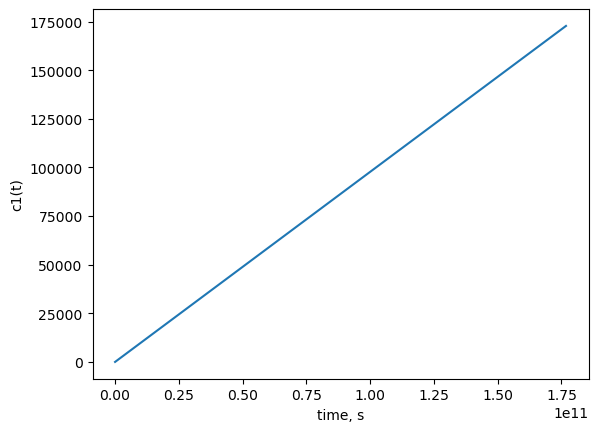

In [14]:
c1 = np.array([u[i][0] for i in range(nP)])

plt.plot(c1, t, linestyle = '-')
plt.xlabel("time, s")
plt.ylabel("c1(t)")
plt.show()


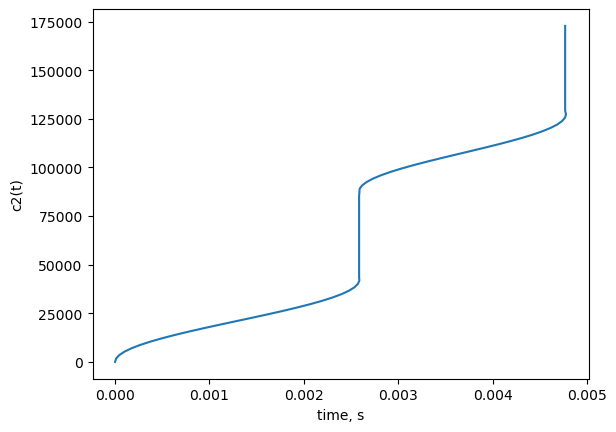

In [15]:
c2 = np.array([u[i][1] for i in range(nP)])

plt.plot(c2, t, linestyle = '-')
plt.xlabel("time, s")
plt.ylabel("c2(t)")
plt.show()

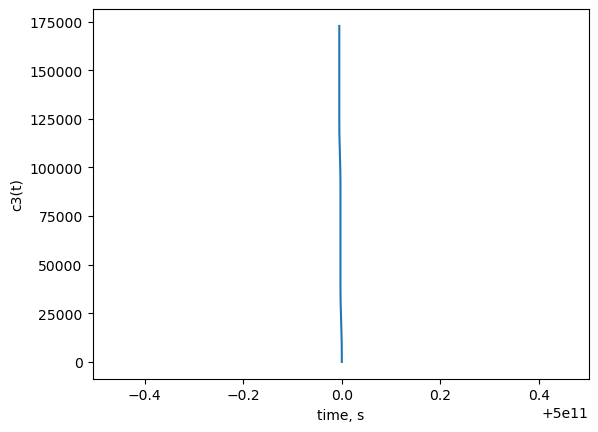

In [16]:
c3 = np.array([u[i][2] for i in range(nP)])

plt.plot(c3, t, linestyle = '-')
plt.xlabel("time, s")
plt.ylabel("c3(t)")
plt.show()

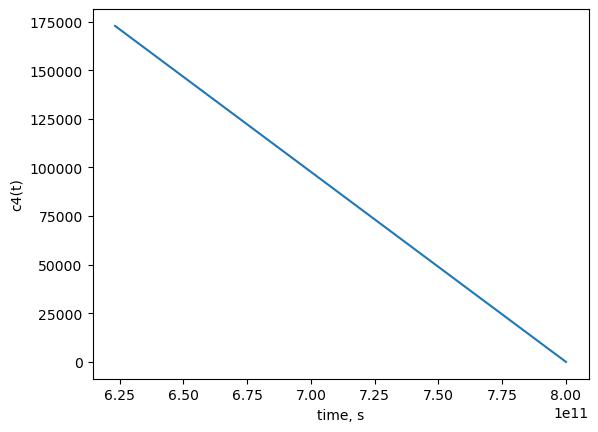

In [17]:
c4 = np.array([u[i][3] for i in range(nP)])

plt.plot(c4, t, linestyle = '-')
plt.xlabel("time, s")
plt.ylabel("c4(t)")
plt.show()